# How many layers?

Neutron reflectometry allows us to obtain structural information about layered materials, such as magnetic multilayers or biological memebranes {cite}`toperverg_polarized_2015,gerelli_phase_2019`.
However, as with all scattering techniques, the recovery of structural information from a reflectometry dataset is an ill-posed problem. 
Hence the application of a model-dependent analysis approach. 

In this exercise, you will investigate the effect of instrumental background on the analysis of reflectometry data from a phospholipid monolayer. 
These systems can be modelled in a variety of different ways, however here we will focus on determining if we can describe it with either one or two layers (these are shown pictorially below, from the work of Campbell *et al.* {cite}`campbell_structure_2018`.)
These models can be either a single layer that describes the structure of the whole monolayer, or a pair of layers description the phospholipid head and tails groups individually.

![A picture showning the description of a phospholipid monolayer with one or two layers](./models.png)

There are four different data files that we will work with in the exercise, and for the reflectometry modelling we will use the Python package `refnx` {cite}`nelson_refnx_2019`. 
Let's first take a look at the data files, where hopefully see that as we increase from `data_0` to `data_3` the level of the background decreases. 

In [1]:
import matplotlib.pyplot as plt
from refnx_imports import *

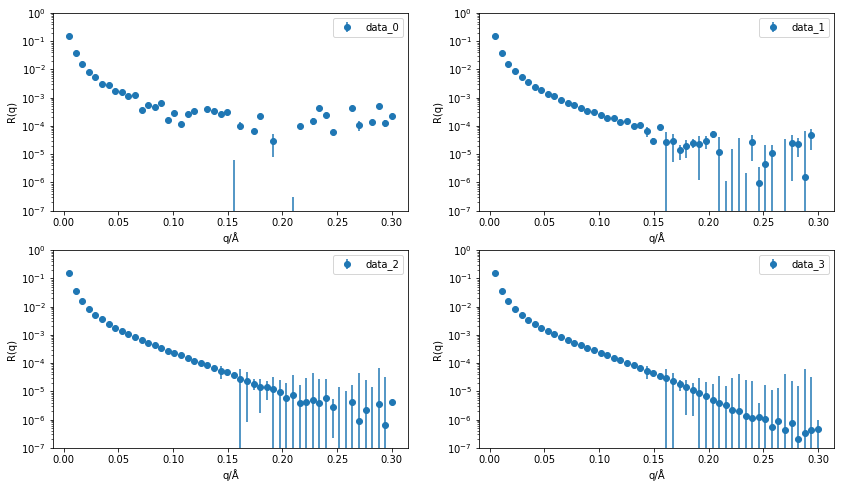

In [2]:
data = []
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
ax = ax.flatten()
for i in [0, 1, 2, 3]:
    data.append(ReflectDataset(f'data_{i}.dat'))
    ax[i].errorbar(data[i].x, data[i].y, data[i].y_err, marker='o', ls='', label=f'data_{i}')
    ax[i].set_yscale('log')
    ax[i].set_xlabel('q/Å')
    ax[i].set_ylabel('R(q)')
    ax[i].set_ylim(1e-7, 1)
    ax[i].legend()
plt.show()

The focus of this exercise, is not to show you how to use the `refnx` package, so we have obfusigated some aspects of this within a seperate piece of Python code (this is available [here](./refnx_imports.py). 
We can import the fitting objective for each of the layers as shown below. 

In [3]:
objective1 = one_layer(data[0])
objective2 = two_layer(data[0])

We can visualise the structure of these two models by plotting the scattering length density as a function of the depth into the interface. 
Note, that there is some "interfacial roughness" between the layers, which is due to the interfaces between the layers not being atomically smooth (for example, water has an inherent roughness of ~3 Å). 

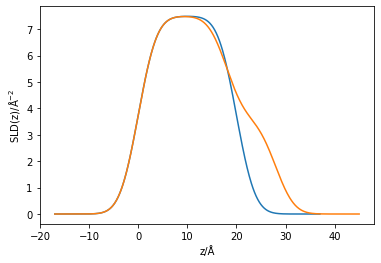

In [10]:
plt.plot(*objective1.model.structure.sld_profile(), label='One layer')
plt.plot(*objective2.model.structure.sld_profile(), label='Two layer')
plt.xlabel('z/Å')
plt.ylabel('SLD(z)/Å$^{-2}$')
plt.show()

In [4]:
objective1.varying_parameters()

Parameters(data=[Parameter(value=5e-06, name='bkg', vary=True, bounds=Interval(lb=1e-08, ub=0.001), constraint=None), Parameter(value=20.0, name='tail - thick', vary=True, bounds=Interval(lb=22.0, ub=35.0), constraint=None)], name=None)